In [1]:
# Necessary for importing modules from a sub-directory
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
if os.getcwd().split('/')[-1] == 'notebooks':
    print("CHANGE DIR TO ROOT")
    os.chdir(r"../")
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

CHANGE DIR TO ROOT


In [2]:
# read in csv-files for each model
df_mallet = pd.read_csv('coherence_files_for_plots/DN_mallet_results.csv')
df_gensim = pd.read_csv('coherence_files_for_plots/DN_gensim_results.csv')

In [3]:
df_mallet.head()

,Date,Model,#articles,#topics,time (s),n_grams,cv_avg,cv_top,cv_bot,umass_avg,umass_top,umass_bot,rs_avg,rs_top,rs_bot
0,21/11/2020 12:04,mallet,50000,10,396.7,False,0.580,0.7191,0.3824,-1.707,-1.4747,-2.0987,0.407,0.6692,0.2031
1,21/11/2020 12:11,mallet,50000,20,409.5,False,0.552,0.7351,0.3951,-2.023,-1.5648,-2.5222,0.357,0.6310,0.1544
2,21/11/2020 12:18,mallet,50000,30,453.8,False,0.561,0.8116,0.3315,-2.088,-1.4327,-3.2394,0.334,0.6149,0.1356
3,21/11/2020 12:27,mallet,50000,40,540.8,False,0.590,0.8274,0.3726,-2.025,-1.3987,-3.3178,0.323,0.6043,0.1269
4,21/11/2020 12:35,mallet,50000,50,500.8,False,0.583,0.8538,0.3080,-2.179,-1.4437,-3.5419,0.311,0.5936,0.1197


In [4]:
df_gensim.head()

,Date,Model,#articles,#topics,time (s),n_grams,cv_avg,cv_top,cv_bot,umass_avg,umass_top,umass_bot,rs_avg,rs_top,rs_bot
0,21/11/2020 10:30,gensim,50000,10,130.9,False,0.532,0.7210,0.3642,-1.826,-1.3901,-2.4265,0.575,0.8824,0.3141
1,21/11/2020 10:33,gensim,50000,20,154.4,False,0.574,0.7407,0.4135,-1.948,-1.5665,-2.4680,0.485,0.8198,0.2423
2,21/11/2020 10:35,gensim,50000,30,164.5,False,0.522,0.7557,0.2935,-2.524,-1.4834,-4.8214,0.447,0.8012,0.2139
3,21/11/2020 10:38,gensim,50000,40,184.3,False,0.520,0.8220,0.2587,-2.682,-1.4497,-5.7959,0.401,0.7254,0.1921
4,21/11/2020 10:43,gensim,50000,50,256.9,False,0.489,0.8057,0.2444,-3.116,-1.4451,-6.6364,0.381,0.7189,0.1797


In [5]:
bytopics_m = df_mallet.groupby(['#topics']).mean()
bytopics_g = df_gensim.groupby(['#topics']).mean()

In [6]:
bytopics_m

,#articles,time (s),n_grams,cv_avg,cv_top,cv_bot,umass_avg,umass_top,umass_bot,rs_avg,rs_top,rs_bot
#topics,,,,,,,,,,,,
10,50000,396.7,False,0.580,0.7191,0.3824,-1.707,-1.4747,-2.0987,0.407,0.6692,0.2031
20,50000,409.5,False,0.552,0.7351,0.3951,-2.023,-1.5648,-2.5222,0.357,0.6310,0.1544
30,50000,453.8,False,0.561,0.8116,0.3315,-2.088,-1.4327,-3.2394,0.334,0.6149,0.1356
40,50000,540.8,False,0.590,0.8274,0.3726,-2.025,-1.3987,-3.3178,0.323,0.6043,0.1269
50,50000,500.8,False,0.583,0.8538,0.3080,-2.179,-1.4437,-3.5419,0.311,0.5936,0.1197
60,50000,526.1,False,0.579,0.8362,0.3375,-2.094,-1.3631,-2.9945,0.309,0.5909,0.1139
70,50000,567.9,False,0.583,0.8238,0.3498,-2.154,-1.4646,-3.3290,0.305,0.5938,0.1113
80,50000,547.9,False,0.584,0.8161,0.2976,-2.245,-1.4428,-3.5214,0.303,0.5933,0.1099
90,50000,557.5,False,0.581,0.8170,0.2682,-2.212,-1.4370,-3.5710,0.296,0.5834,0.1069


In [7]:
bytopics_g

,#articles,time (s),n_grams,cv_avg,cv_top,cv_bot,umass_avg,umass_top,umass_bot,rs_avg,rs_top,rs_bot
#topics,,,,,,,,,,,,
10,50000,130.9,False,0.532,0.7210,0.3642,-1.826,-1.3901,-2.4265,0.575,0.8824,0.3141
20,50000,154.4,False,0.574,0.7407,0.4135,-1.948,-1.5665,-2.4680,0.485,0.8198,0.2423
30,50000,164.5,False,0.522,0.7557,0.2935,-2.524,-1.4834,-4.8214,0.447,0.8012,0.2139
40,50000,184.3,False,0.520,0.8220,0.2587,-2.682,-1.4497,-5.7959,0.401,0.7254,0.1921
50,50000,256.9,False,0.489,0.8057,0.2444,-3.116,-1.4451,-6.6364,0.381,0.7189,0.1797
60,50000,290.7,False,0.506,0.7805,0.2356,-3.338,-1.5073,-7.5577,0.351,0.6614,0.1649
70,50000,288.1,False,0.468,0.7697,0.2543,-3.361,-1.5581,-7.6126,0.338,0.6313,0.1623
80,50000,462.7,False,0.467,0.7711,0.2287,-3.445,-1.5286,-7.7386,0.334,0.6487,0.1550
90,50000,530.8,False,0.481,0.8210,0.2382,-3.901,-1.5549,-9.3322,0.315,0.6029,0.1454


In [8]:
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

# Cv
y1 = bytopics_g['cv_avg']
y2 = bytopics_g['cv_bot']
y3 = bytopics_m['cv_avg']
y4 = bytopics_m['cv_bot']

# Umass
y5 = bytopics_g['umass_avg']
y6 = bytopics_g['umass_bot']
y7 = bytopics_m['umass_avg']
y8 = bytopics_m['umass_bot']

#RS
y9 = bytopics_g['rs_avg']
y10 = bytopics_g['rs_bot']
y11 = bytopics_m['rs_avg']
y12 = bytopics_m['rs_bot']

In [13]:
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = [12, 3.5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams["font.family"] = "DejaVu Sans"

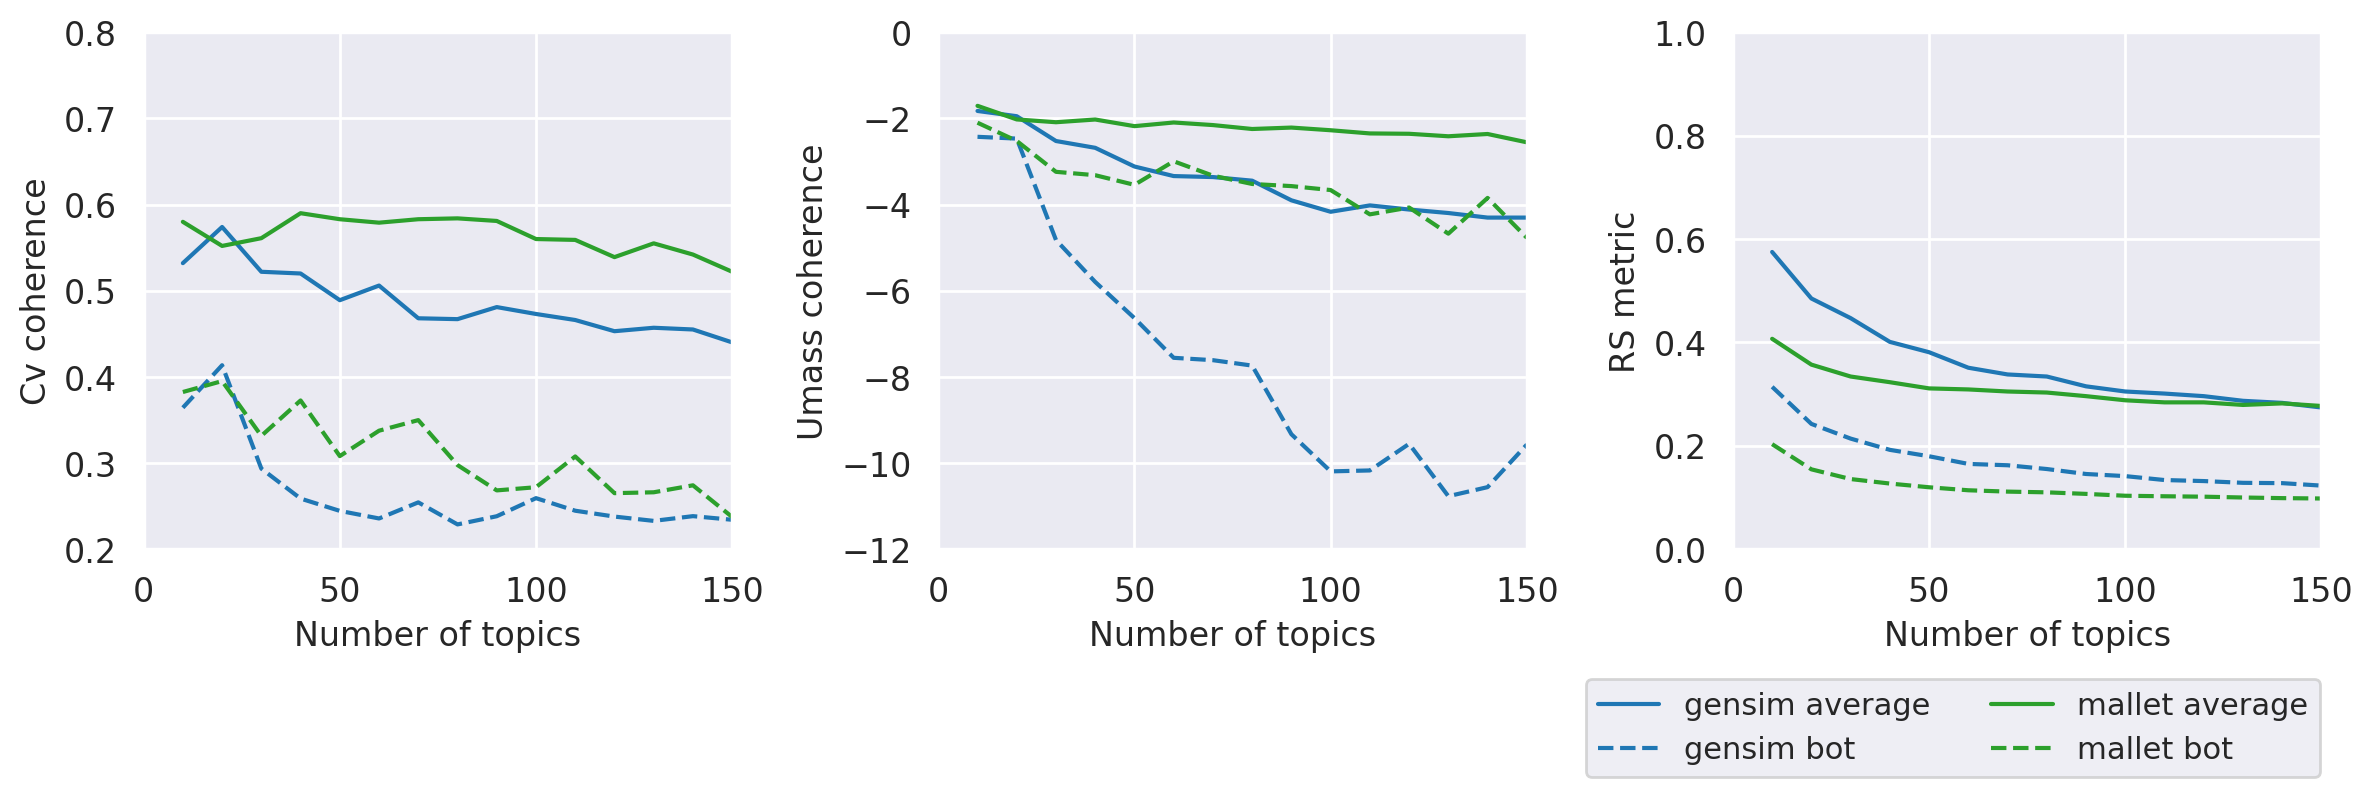

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1)
ax1.set(ylim=(0.2, 0.8))
ax2.set(ylim=(-12, 0))
ax3.set(ylim=(0, 1))
ax1.set(xlim=(0, 150))
ax2.set(xlim=(0, 150))
ax3.set(xlim=(0, 150))

# Cv
ax1.plot(x, y1, color='tab:blue', label = "gensim average")
ax1.plot(x, y2, color='tab:blue', linestyle='dashed', label = "gensim bot")
ax1.plot(x, y3, color='tab:green', label = "mallet average")
ax1.plot(x, y4, color='tab:green', linestyle='dashed', label = "mallet bot")
ax1.set_xlabel('Number of topics')
ax1.set_ylabel('Cv coherence')

# Umass
ax2.plot(x, y5, color='tab:blue', label = "gensim average")
ax2.plot(x, y6, color='tab:blue', linestyle='dashed', label = "gensim bot")
ax2.plot(x, y7, color='tab:green', label = "mallet average")
ax2.plot(x, y8, color='tab:green', linestyle='dashed', label = "mallet bot")
ax2.set_xlabel('Number of topics')
ax2.set_ylabel('Umass coherence')

# RS
ax3.plot(x, y9, color='tab:blue', label = "gensim average")
ax3.plot(x, y10, color='tab:blue', linestyle='dashed', label = "gensim bot")
ax3.plot(x, y11, color='tab:green', label = "mallet average")
ax3.plot(x, y12, color='tab:green', linestyle='dashed', label = "mallet bot")
ax3.set_xlabel('Number of topics')
ax3.set_ylabel('RS metric')

fig.tight_layout(pad=1.0)
ax3.legend(bbox_to_anchor=(0,-0.5,1.05,0), loc="lower right", borderaxespad=1, ncol=2)

plt.show()